In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covtype.data',header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df[54].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [8]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54],
           dtype='int64')

Последняя цифра 9: Положительный класс - 5

In [9]:
class_names_dict = {1:'0',2:'0',3:'0',4:'0', 5:'1',6:'0',7:'0'}
df['ClassName'] = df[54].map(class_names_dict)

In [10]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,ClassName
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,5,1
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,5,1
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,2,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,2,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,5,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 56 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   0          581012 non-null  int64 
 1   1          581012 non-null  int64 
 2   2          581012 non-null  int64 
 3   3          581012 non-null  int64 
 4   4          581012 non-null  int64 
 5   5          581012 non-null  int64 
 6   6          581012 non-null  int64 
 7   7          581012 non-null  int64 
 8   8          581012 non-null  int64 
 9   9          581012 non-null  int64 
 10  10         581012 non-null  int64 
 11  11         581012 non-null  int64 
 12  12         581012 non-null  int64 
 13  13         581012 non-null  int64 
 14  14         581012 non-null  int64 
 15  15         581012 non-null  int64 
 16  16         581012 non-null  int64 
 17  17         581012 non-null  int64 
 18  18         581012 non-null  int64 
 19  19         581012 non-null  int64 
 20  20  

In [14]:
df['ClassName'].value_counts()

0    571519
1      9493
Name: ClassName, dtype: int64

In [12]:
df=df.drop([54],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["ClassName"], axis=1), df["ClassName"], test_size=0.3, random_state=60)

# Модель с использованием алгоритма RandomForest

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [14]:
X_train.columns = X_train.columns.astype(str)

In [15]:
X_test.columns = X_test.columns.astype(str)

In [50]:
parameters = {'n_estimators': [40, 60, 100], 'max_depth':[5, 10, 25]}
model1 = RandomForestClassifier()
gridForest = GridSearchCV(estimator=model1, param_grid=parameters)
gridForest.fit(X_train, y_train)
print('Best score:', round(gridForest.best_score_,3))
print('Best model:', gridForest.best_estimator_)

Best score: 0.993
Best model: RandomForestClassifier(max_depth=25, n_estimators=60)


In [18]:
rf_model = RandomForestClassifier(max_depth=25)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=25)

In [19]:
y_pred_rf = rf_model.predict(X_test)

Точность модели

In [53]:
print(classification_report(y_true=y_test, y_pred=y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    171513
           1       0.95      0.66      0.78      2791

    accuracy                           0.99    174304
   macro avg       0.97      0.83      0.89    174304
weighted avg       0.99      0.99      0.99    174304



Визуализация важности признаков для модели (RandomForest)

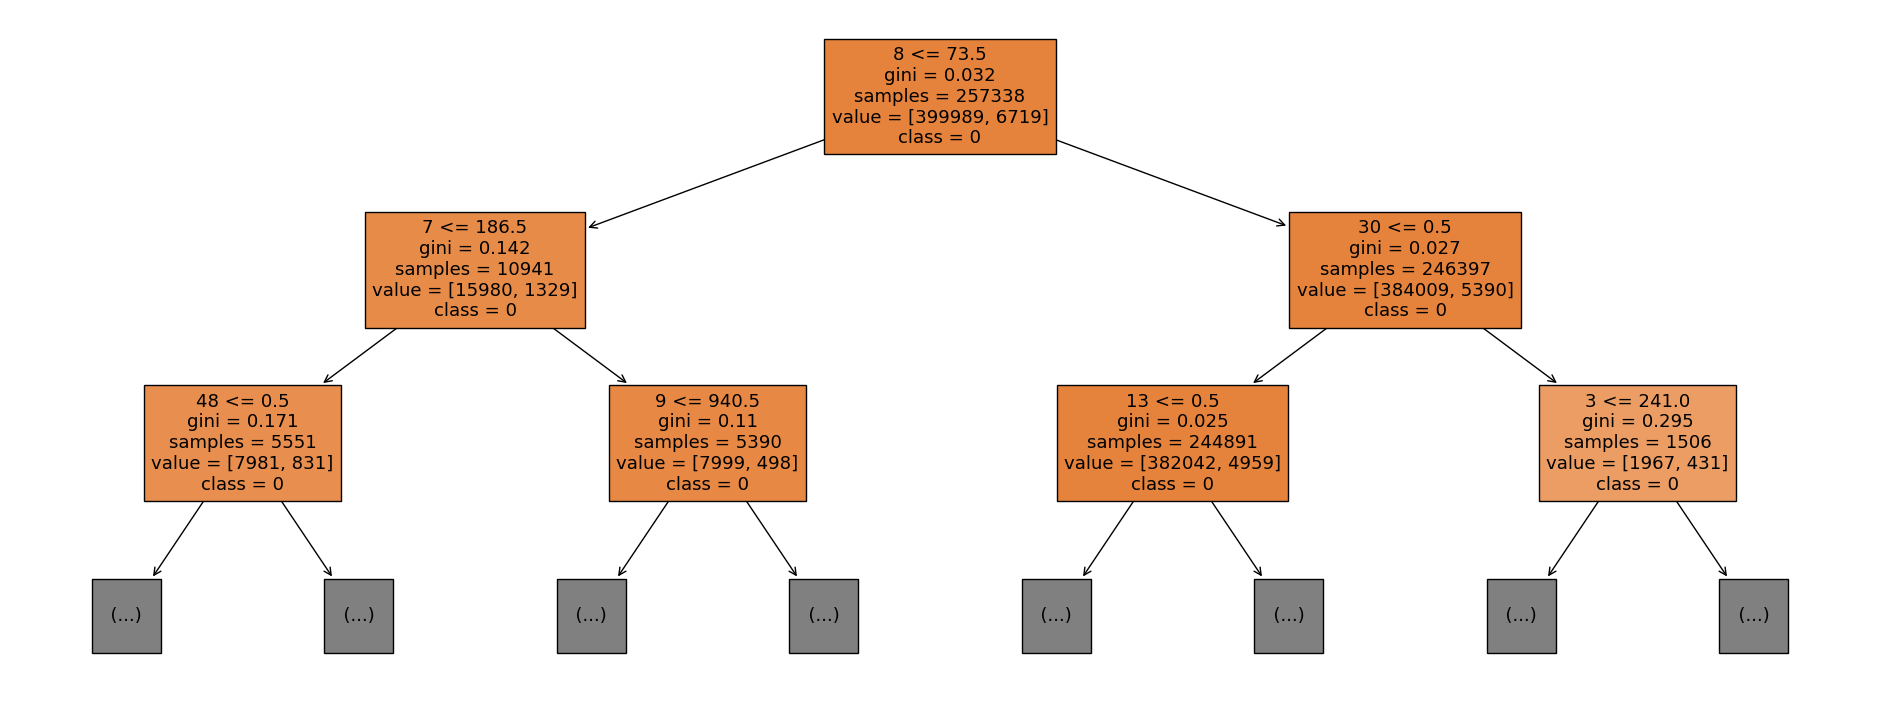

<Figure size 640x480 with 0 Axes>

In [75]:
class_names =['0','1']
plt.figure(figsize=(24,9))
tree.plot_tree(rf_model.estimators_[0], feature_names=X_train.columns, class_names=class_names, max_depth = 2, filled = True)

plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/randomforest_classifer_tree_model.png')

In [30]:
feature_importances_tree_rf = pd.DataFrame(rf_model.feature_importances_,columns=['Importance'],index = X_train.columns).sort_values('Importance', ascending=False)

In [31]:
feature_importances_tree_rf.head(7)

,Importance
0,0.167148
5,0.153819
9,0.138290
4,0.073728
3,0.071516
8,0.065224
1,0.062473


In [46]:
feature_importances_tree_rf=feature_importances_tree_rf.sort_values('Importance', ascending=True)

<Axes: >

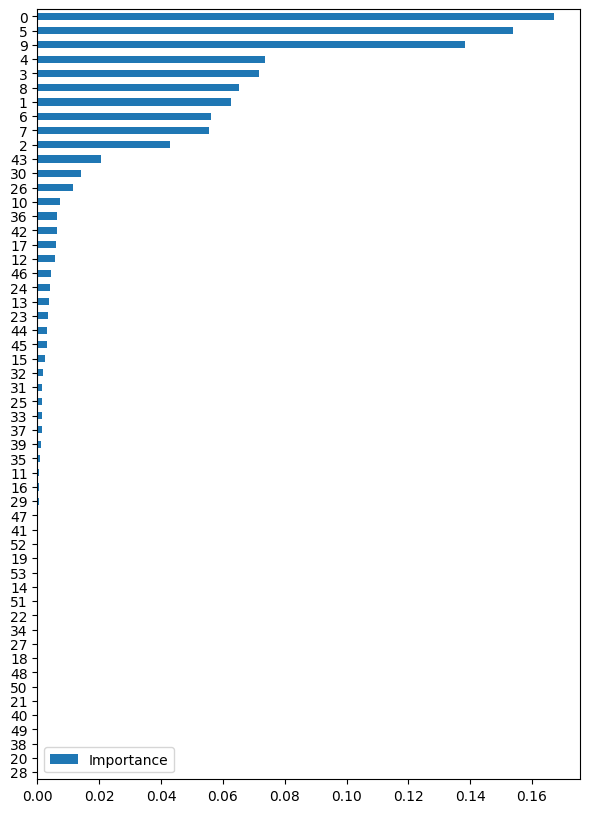

In [48]:
feature_importances_tree_rf.plot.barh(figsize=(7,10))

# Модель с использованием алгоритма DecisionTree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
parameters = {'max_features': [5, 10, 15], 'max_depth':[5, 10, 25]}
model2 = DecisionTreeClassifier()
gridDecTree = GridSearchCV(estimator=model2, param_grid=parameters)
gridDecTree.fit(X_train, y_train)
print('Best score:', round(gridDecTree.best_score_,3))
print('Best model:', gridDecTree.best_estimator_)

Best score: 0.992
Best model: DecisionTreeClassifier(max_depth=25, max_features=15)


In [34]:
dt_model = DecisionTreeClassifier(max_depth=25, max_features=15)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, max_features=15)

In [35]:
y_pred_dt = dt_model.predict(X_test)

Точность модели

In [36]:
print(classification_report(y_true=y_test, y_pred=y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171513
           1       0.78      0.73      0.75      2791

    accuracy                           0.99    174304
   macro avg       0.89      0.86      0.87    174304
weighted avg       0.99      0.99      0.99    174304



Визуализация важности признаков для модели (DecisionTree)

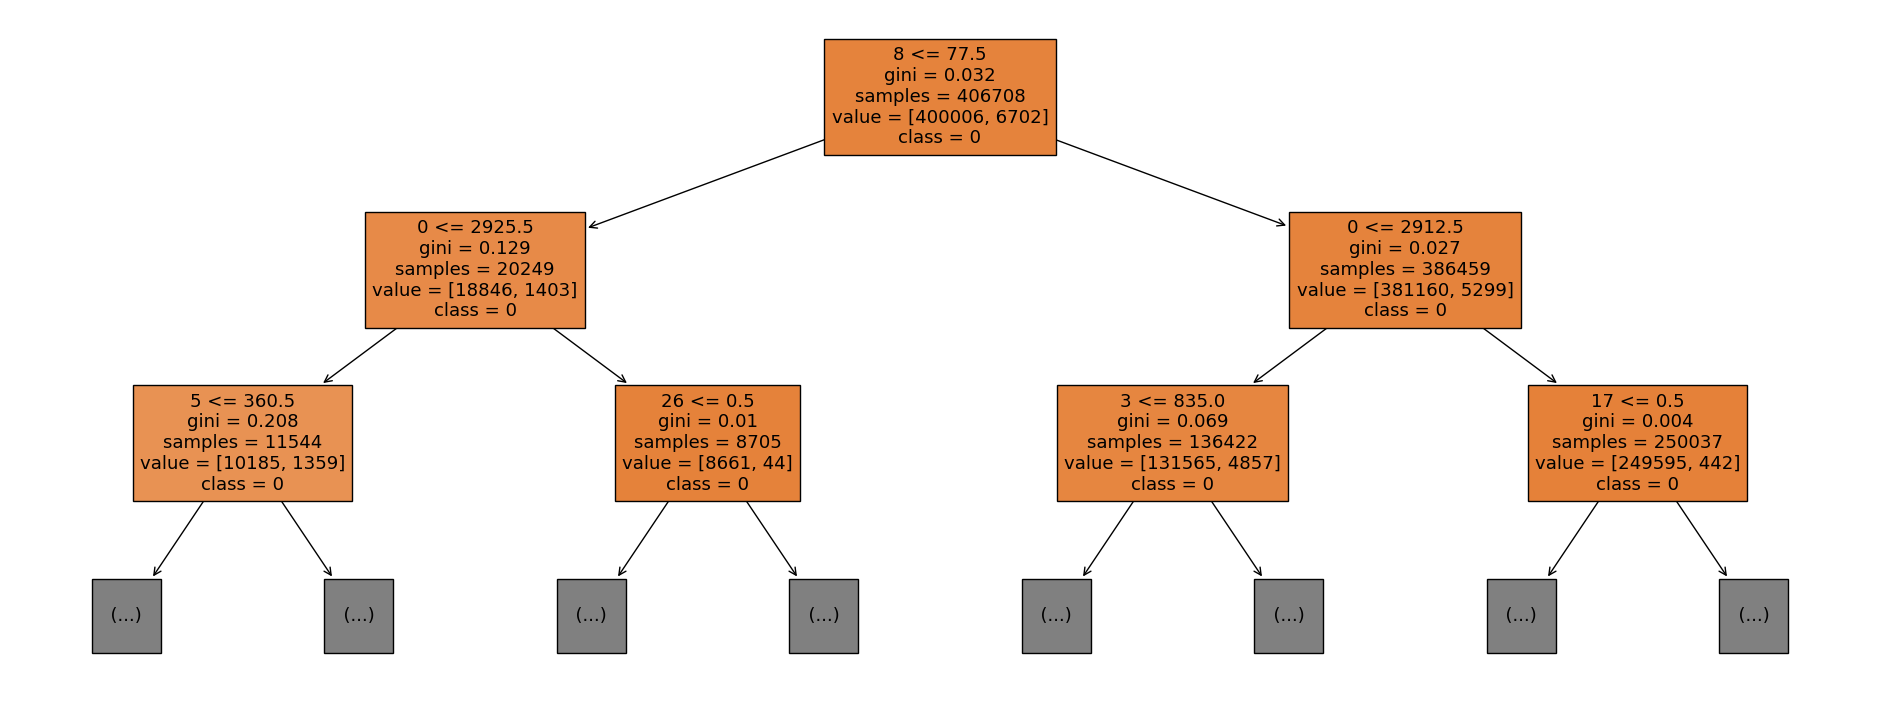

<Figure size 640x480 with 0 Axes>

In [38]:
class_names =['0','1']
plt.figure(figsize=(24,9))
tree.plot_tree(dt_model, feature_names=X_train.columns, class_names=class_names, max_depth = 2, filled = True)

plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/decisiontree_classifer_tree_model.png')

In [39]:
feature_importances_tree_df = pd.DataFrame(dt_model.feature_importances_,columns=['Importance'],index = X_train.columns).sort_values('Importance', ascending=False)

In [40]:
feature_importances_tree_df.head(7)

,Importance
5,0.168611
0,0.162688
9,0.161966
3,0.075952
4,0.072123
8,0.058395
6,0.050294


In [42]:
feature_importances_tree_df=feature_importances_tree_df.sort_values('Importance', ascending=True)

<Axes: >

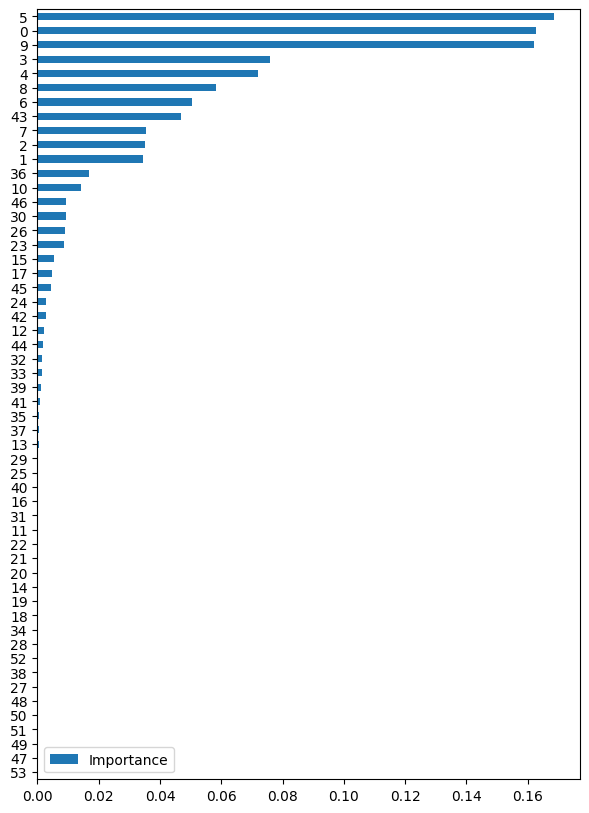

In [49]:
feature_importances_tree_df.plot.barh(figsize=(7,10))

# Модель с использованием алгоритма LogisticRegression

In [50]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(df.drop(["ClassName"], axis=1))

In [51]:
from sklearn.utils import resample

In [86]:
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,ClassName
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,1
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,1
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,0
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,0
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,0
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df['ClassName'].value_counts()

0    571519
1      9493
Name: ClassName, dtype: int64

In [52]:
ONE_messages = df[df['ClassName'] == '1']
ZERO_messages = df[df['ClassName'] == '0']
ONE_UPsample = resample(ONE_messages, replace=True, n_samples=571519, random_state=47)
print(ONE_messages.shape)

df_UPsampled = pd.concat([ONE_UPsample, ZERO_messages])

(9493, 55)


In [53]:
print(df.shape)
print(df_UPsampled.shape)

(581012, 55)
(1143038, 55)


In [54]:
X_scaled = minmax_scaler.fit_transform(df_UPsampled.drop(["ClassName"], axis=1))

In [55]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, df_UPsampled["ClassName"], test_size = 0.3,random_state=1)

In [56]:
from sklearn.linear_model import LogisticRegression

In [105]:
parameters = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
model3 = LogisticRegression(max_iter=1000)
gridLogReg = GridSearchCV(estimator=model3, param_grid=parameters)
gridLogReg.fit(X_train_scaled, y_train)
print('Best score:', round(gridLogReg.best_score_,3))
print('Best model:', gridLogReg.best_estimator_)

Best score: 0.856
Best model: LogisticRegression(C=1000.0, max_iter=1000)


In [57]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(C=0.001, max_iter=1000, random_state = 47)
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001, max_iter=1000, random_state=47)

In [58]:
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

Точность модели (LogisticRegression)

In [59]:
print(classification_report(y_true=y_test, y_pred=y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82    171354
           1       0.81      0.85      0.83    171558

    accuracy                           0.82    342912
   macro avg       0.82      0.82      0.82    342912
weighted avg       0.82      0.82      0.82    342912



Визуализация важности признаков для модели (LogisticRegression)

In [66]:
coefficients = log_reg_model.coef_[0]

feature_importances_lr = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})

In [74]:
feature_importances_lr = feature_importances_lr.sort_values('Importance', ascending=False)
feature_importances_lr.head(7)

,Feature,Importance
0,0,4.535342
5,5,2.259353
13,13,2.249398
30,30,1.784066
12,12,1.769453
25,25,1.690754
35,35,1.437342


<Axes: ylabel='Feature'>

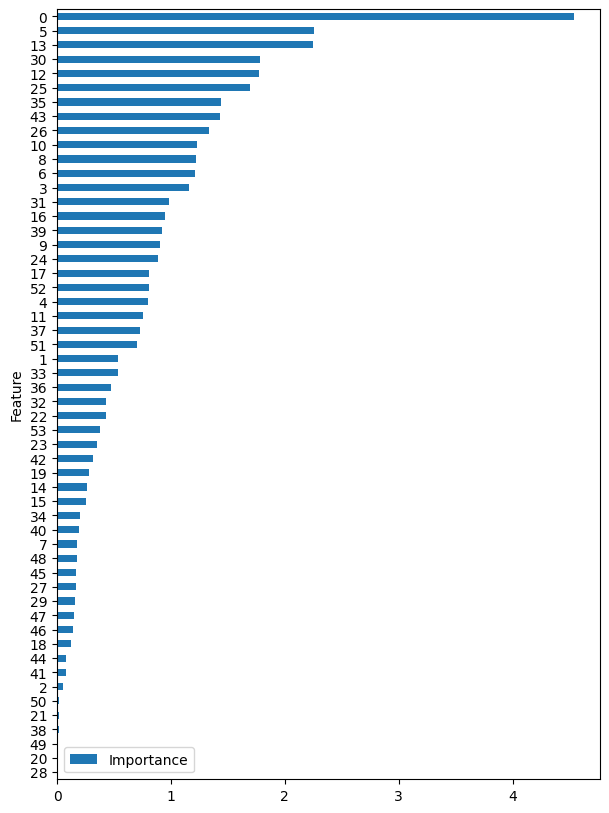

In [72]:
feature_importances_lr = feature_importances_lr.sort_values('Importance', ascending=True)
feature_importances_lr.plot(x='Feature', y='Importance', kind='barh', figsize=(7, 10))

# Короткое заключение о наиболее интересных зависимостях
Среди всех признаков наиболее важными оказались признаки 0 и 5 (Elevation и Horizontal_Distance_To_Roadways), у моделей с алгоритмами RandomForest И DecisionTree также имеется значимый общий признак с номером 9 (Horizontal_Distance_To_Fire_Points). Самой точной оказалась первая модель (RandomForest), возможно благодаря правильной зависимости признаков (признак 0 значимее признака 5, но не слишком, как в модели с алгоритмом LogisticRegression, у которой оказалась наименьшая точность)